In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('data/005930.txt', index_col=0, parse_dates=True)
cols = df.columns
df['date'] = df.index.date
df = df.loc[(df.date == df.date.shift()) | (df.date ==df.date.shift(-1)), ][cols]
df.head()

,open,high,low,close,volume,sell,buy,kospi
date,,,,,,,,
2017-04-24 09:02:00,41200,41200,41180,41200,41700,12700.0,29000.0,2176.090088
2017-04-24 09:03:00,41200,41220,41180,41200,21750,5250.0,16500.0,2176.260010
2017-04-24 09:04:00,41200,41220,41200,41200,25450,6900.0,18550.0,2176.260010
2017-04-24 09:05:00,41200,41200,41140,41140,15350,7850.0,7500.0,2175.459961
2017-04-24 09:06:00,41140,41180,41140,41160,16450,6100.0,10350.0,2174.350098


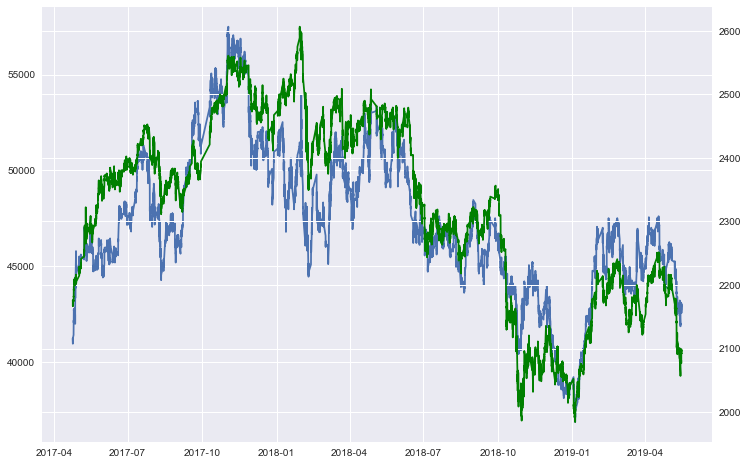

In [87]:
plt.style.use('seaborn')
plt.figure(figsize=(12,8))
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax1.plot(df.close)
ax2.plot(df.kospi, c = 'g')
plt.show()

자료의 수가 너무 많으면 결과가 너무 난잡할 수 있으므로, 다운샘플링을 실시한다

In [88]:
df_20 = pd.DataFrame()
df_20['open'] = df.open.resample('20t').first()
df_20['high'] = df.open.resample('20t').max()
df_20['low'] = df.open.resample('20t').min()
df_20['close'] = df.open.resample('20t').last()
df_20

,open,high,low,close
date,,,,
2017-04-24 09:00:00,41200.0,41200.0,41040.0,41100.0
2017-04-24 09:20:00,41100.0,41100.0,41020.0,41040.0
2017-04-24 09:40:00,41060.0,41240.0,41040.0,41240.0
2017-04-24 10:00:00,41240.0,41240.0,41180.0,41180.0
2017-04-24 10:20:00,41180.0,41180.0,41080.0,41080.0
...,...,...,...,...
2019-05-15 14:00:00,42900.0,42950.0,42850.0,42850.0
2019-05-15 14:20:00,42850.0,42900.0,42800.0,42850.0
2019-05-15 14:40:00,42800.0,42900.0,42800.0,42800.0


In [89]:
def mindata(df,h) : 
    
    temp = pd.DataFrame()
    temp['open'] = df.open.resample(h).first().dropna()
    temp['high'] = df.high.resample(h).max()
    temp['low'] = df.low.resample(h).min()
    temp['close'] = df.close.resample(h).last()
    temp['volume'] = df.volume.resample(h).sum()
    temp['buy'] = df.buy.resample(h).sum()
    temp['sell'] = df.sell.resample(h).sum()
    temp['kospi'] = df.kospi.resample(h).last()
    
    return temp

df_20 = mindata(df,'20t')

In [90]:
df_20

,open,high,low,close,volume,buy,sell,kospi
date,,,,,,,,
2017-04-24 09:00:00,41200.0,41220.0,41020.0,41080.0,399100,222300.0,176800.0,2174.939941
2017-04-24 09:20:00,41100.0,41100.0,41020.0,41060.0,370150,150050.0,220100.0,2172.189941
2017-04-24 09:40:00,41060.0,41260.0,41040.0,41220.0,566700,431150.0,135550.0,2174.409912
2017-04-24 10:00:00,41240.0,41240.0,41160.0,41160.0,501700,225550.0,276150.0,2172.889893
2017-04-24 10:20:00,41180.0,41180.0,41060.0,41080.0,242950,123050.0,119900.0,2169.459961
...,...,...,...,...,...,...,...,...
2019-05-15 14:00:00,42900.0,42950.0,42850.0,42850.0,209119,79810.0,129309.0,2093.709961
2019-05-15 14:20:00,42850.0,42900.0,42800.0,42850.0,225300,71416.0,153884.0,2093.469971
2019-05-15 14:40:00,42800.0,42900.0,42800.0,42800.0,284886,157144.0,127742.0,2094.699951


In [91]:
df_20['ret'] = df_20.close.pct_change()

<AxesSubplot:xlabel='ret', ylabel='Count'>

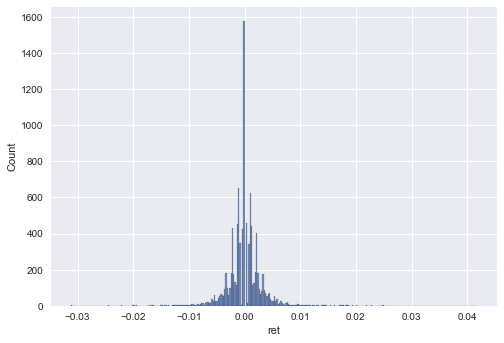

In [97]:
sns.histplot(df_20.ret)

In [98]:
print(df_20.ret.mean()) # 평균
print(df_20.ret.std()) # 리스크
print(df_20.ret.skew()) # 비대칭도, 왜도
print(df_20.ret.kurtosis()) # 첨도
print(df_20.ret.autocorr()) # 자기상관계수

9.97348505534206e-06
0.003588090737379132
0.21745939141146095
16.37912382375123
-0.037096347114591574


In [99]:
df_20['kospi_ret'] = df_20.kospi.pct_change() # 코스피 수익률
df_20['of'] = df_20.buy - df_20.sell # 주문흐름
df_20['volatility'] = df_20['ret']**2 # 거래 가격의 변동정도

In [100]:
df_20

,open,high,low,close,volume,buy,sell,kospi,ret,kospi_ret,of,volatility
date,,,,,,,,,,,,
2017-04-24 09:00:00,41200.0,41220.0,41020.0,41080.0,399100,222300.0,176800.0,2174.939941,NaN,NaN,45500.0,NaN
2017-04-24 09:20:00,41100.0,41100.0,41020.0,41060.0,370150,150050.0,220100.0,2172.189941,-0.000487,-0.001264,-70050.0,2.370277e-07
2017-04-24 09:40:00,41060.0,41260.0,41040.0,41220.0,566700,431150.0,135550.0,2174.409912,0.003897,0.001022,295600.0,1.518456e-05
2017-04-24 10:00:00,41240.0,41240.0,41160.0,41160.0,501700,225550.0,276150.0,2172.889893,-0.001456,-0.000699,-50600.0,2.118783e-06
2017-04-24 10:20:00,41180.0,41180.0,41060.0,41080.0,242950,123050.0,119900.0,2169.459961,-0.001944,-0.001579,3150.0,3.777715e-06
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-15 14:00:00,42900.0,42950.0,42850.0,42850.0,209119,79810.0,129309.0,2093.709961,-0.002328,-0.000277,-49499.0,5.420928e-06
2019-05-15 14:20:00,42850.0,42900.0,42800.0,42850.0,225300,71416.0,153884.0,2093.469971,0.000000,-0.000115,-82468.0,0.000000e+00
2019-05-15 14:40:00,42800.0,42900.0,42800.0,42800.0,284886,157144.0,127742.0,2094.699951,-0.001167,0.000588,29402.0,1.361565e-06


In [101]:
df_20['date'] = df_20.index.date
df_20['overnight'] = 0
df_20.loc[df_20.date!=df_20.date.shift(), 'overnight'] = df_20.loc[df_20.date!=df_20.date.shift(), 'ret']
df_20.overnight[df_20.overnight!=0]

date
2017-04-24 09:00:00         NaN
2017-04-25 09:00:00    0.014549
2017-04-26 09:00:00    0.000468
2017-04-27 09:00:00    0.002804
2017-04-28 09:00:00    0.030109
                         ...   
2019-05-08 09:00:00   -0.012263
2019-05-09 09:00:00   -0.004520
2019-05-10 09:00:00    0.008245
2019-05-13 09:00:00   -0.009324
2019-05-14 09:00:00   -0.011723
Name: overnight, Length: 483, dtype: float64

In [102]:
df_20.date.shift()

date
2017-04-24 09:00:00           NaN
2017-04-24 09:20:00    2017-04-24
2017-04-24 09:40:00    2017-04-24
2017-04-24 10:00:00    2017-04-24
2017-04-24 10:20:00    2017-04-24
                          ...    
2019-05-15 14:00:00    2019-05-15
2019-05-15 14:20:00    2019-05-15
2019-05-15 14:40:00    2019-05-15
2019-05-15 15:00:00    2019-05-15
2019-05-15 15:20:00    2019-05-15
Name: date, Length: 9934, dtype: object

In [103]:
test1 = df_20.dropna()
y = (test1.ret - test1.overnight) * 100
X = np.log(test1[['volatility', 'volume']]+1)
X['of'] = test1.of
X['kospi_ret'] = test1.kospi_ret * 100
X

,volatility,volume,of,kospi_ret
date,,,,
2017-04-24 09:20:00,2.370277e-07,12.821666,-70050.0,-0.126440
2017-04-24 09:40:00,1.518444e-05,13.247587,295600.0,0.102200
2017-04-24 10:00:00,2.118781e-06,13.125760,-50600.0,-0.069905
2017-04-24 10:20:00,3.777708e-06,12.400615,3150.0,-0.157851
2017-04-24 10:40:00,2.133247e-06,12.516681,19350.0,-0.102790
...,...,...,...,...
2019-05-15 14:00:00,5.420914e-06,12.250664,-49499.0,-0.027698
2019-05-15 14:20:00,0.000000e+00,12.325193,-82468.0,-0.011462
2019-05-15 14:40:00,1.361564e-06,12.559848,29402.0,0.058753


In [104]:
import statsmodels.api as sm

# set X and y
test1 = df_20.dropna()

y = (test1.ret - test1.overnight) * 100
X = np.log(test1[['volatility', 'volume']]+1)
X['of'] = test1.of
X['kospi_ret'] = test1.kospi_ret * 100
X = sm.add_constant(X)
X.corr()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,volatility,volume,of,kospi_ret
const,NaN,NaN,NaN,NaN,NaN
volatility,NaN,1.000000,0.323538,0.035923,-0.038217
volume,NaN,0.323538,1.000000,0.355214,-0.002918
of,NaN,0.035923,0.355214,1.000000,0.126601
kospi_ret,NaN,-0.038217,-0.002918,0.126601,1.000000


In [105]:
y

date
2017-04-24 09:20:00   -0.048685
2017-04-24 09:40:00    0.389674
2017-04-24 10:00:00   -0.145560
2017-04-24 10:20:00   -0.194363
2017-04-24 10:40:00   -0.146056
                         ...   
2019-05-15 14:00:00   -0.232829
2019-05-15 14:20:00    0.000000
2019-05-15 14:40:00   -0.116686
2019-05-15 15:00:00   -0.233645
2019-05-15 15:20:00   -0.351288
Length: 9933, dtype: float64

In [106]:
import statsmodels.api as sm

ols = sm.OLS(y,X)

In [109]:
res = ols.fit()
res.summary()
# y는 수익률

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     865.0
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        01:11:51   Log-Likelihood:                 989.01
No. Observations:                9933   AIC:                            -1968.
Df Residuals:                    9928   BIC:                            -1932.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4739      0.052      9.062      0.000       0.371       0.576
volatility   457.3620     42.305     10.811      0.000     374.435     540.289
volume        -0.0373      0.004     -9.234      0.000      -0.045      -0.029
of          8.508e-08    4.7e-09     18.110      0.000    7.59e-08    9.43e-08
kospi_ret      0.6664      0.013     52.591      0.000       0.642       0.691
==============================================================================
Omnibus:                     1771.534   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43436.192
Skew:                           0.087   Prob(JB):                         0.00
Kurtosis:                      13.243   Cond. No.                     9.84e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.84e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

-3.556217822669763e-09
0.2190497430083469
0.08746648968292794
10.248781036188268
-0.02891407187720575


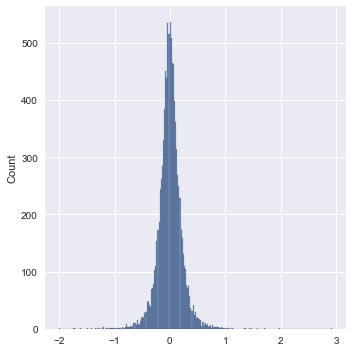

In [110]:
sns.displot(res.resid)
print(res.resid.mean())
print(res.resid.std())
print(res.resid.skew())
print(res.resid.kurtosis())
print(res.resid.autocorr())

In [112]:
import statsmodels.formula.api as smf
test2 = test1.copy()
test2['y'] = test2.ret - test1.overnight
mod = smf.ols(formula='y ~ kospi_ret + volatility + volume', data=test2).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     1008.
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        01:16:53   Log-Likelihood:                 46567.
No. Observations:                9933   AIC:                        -9.313e+04
Df Residuals:                    9929   BIC:                        -9.310e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.353e-05   3.13e-05     -0.751      0.453    -8.5e-05    3.79e-05
kospi_ret      0.6968      0.013     54.580      0.000       0.672       0.722
volatility     3.6901      0.436      8.472      0.000       2.836       4.544
volume      -4.03e-11   4.24e-11     -0.952      0.341   -1.23e-10    4.27e-11
==============================================================================
Omnibus:                     1800.301   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42668.698
Skew:                           0.176   Prob(JB):                         0.00
Kurtosis:                      13.147   Cond. No.                     1.54e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
np.random.seed(10)
temp = np.random.normal(size=500)
y = np.cumsum(temp)
np.random.seed(20)
temp = np.random.normal(size=500)
X = np.cumsum(temp)
reg = sm.OLS(y, sm.add_constant(X)).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     1039.
Date:                Thu, 05 May 2022   Prob (F-statistic):          5.99e-124
Time:                        01:24:37   Log-Likelihood:                -1299.1
No. Observations:                 500   AIC:                             2602.
Df Residuals:                     498   BIC:                             2611.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7612      0.176     55.471      0.000       9.415      10.107
x1             0.6986      0.022     32.231      0.000       0.656       0.741
==============================================================================
Omnibus:                       17.688   Durbin-Watson:                   0.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.618
Skew:                          -0.465   Prob(JB):                     9.06e-05
Kurtosis:                       3.174   Cond. No.                         9.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
df_20

,open,high,low,close,volume,buy,sell,kospi,ret,kospi_ret,of,volatility,date,overnight
date,,,,,,,,,,,,,,
2017-04-24 09:00:00,41200.0,41220.0,41020.0,41080.0,399100,222300.0,176800.0,2174.939941,NaN,NaN,45500.0,NaN,2017-04-24,NaN
2017-04-24 09:20:00,41100.0,41100.0,41020.0,41060.0,370150,150050.0,220100.0,2172.189941,-0.000487,-0.001264,-70050.0,2.370277e-07,2017-04-24,0.0
2017-04-24 09:40:00,41060.0,41260.0,41040.0,41220.0,566700,431150.0,135550.0,2174.409912,0.003897,0.001022,295600.0,1.518456e-05,2017-04-24,0.0
2017-04-24 10:00:00,41240.0,41240.0,41160.0,41160.0,501700,225550.0,276150.0,2172.889893,-0.001456,-0.000699,-50600.0,2.118783e-06,2017-04-24,0.0
2017-04-24 10:20:00,41180.0,41180.0,41060.0,41080.0,242950,123050.0,119900.0,2169.459961,-0.001944,-0.001579,3150.0,3.777715e-06,2017-04-24,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-15 14:00:00,42900.0,42950.0,42850.0,42850.0,209119,79810.0,129309.0,2093.709961,-0.002328,-0.000277,-49499.0,5.420928e-06,2019-05-15,0.0
2019-05-15 14:20:00,42850.0,42900.0,42800.0,42850.0,225300,71416.0,153884.0,2093.469971,0.000000,-0.000115,-82468.0,0.000000e+00,2019-05-15,0.0
2019-05-15 14:40:00,42800.0,42900.0,42800.0,42800.0,284886,157144.0,127742.0,2094.699951,-0.001167,0.000588,29402.0,1.361565e-06,2019-05-15,0.0


In [145]:
flow = df_20['of']

In [122]:
retrate = df_20['kospi_ret'].dropna()

In [128]:
flow = flow[:9933]

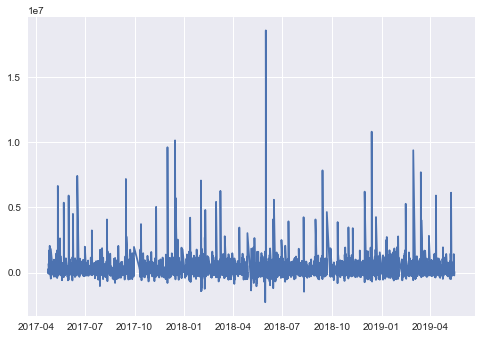

In [130]:
plt.plot(flow)

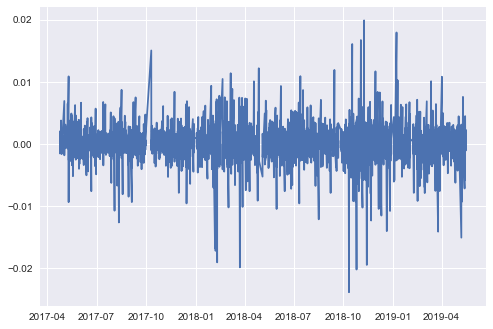

In [131]:
plt.plot(retrate)

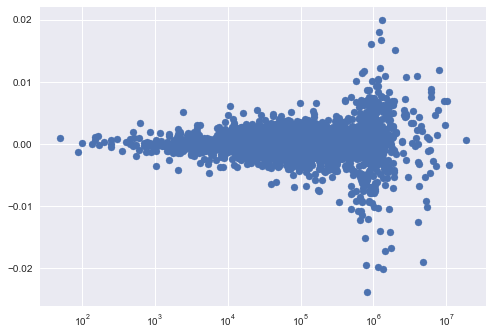

In [133]:
plt.scatter(flow,retrate)
plt.xscale('log')
plt.show()

In [142]:
flow = flow / flow[0]

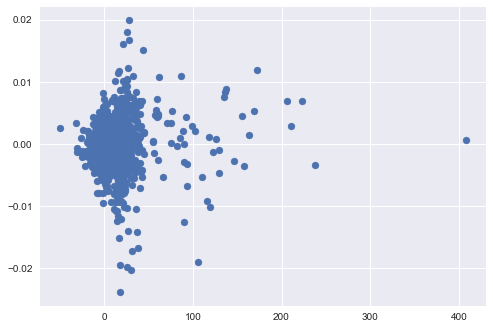

In [144]:
plt.scatter(flow,retrate)
plt.show()

In [149]:
flow = flow.pct_change()

In [153]:
flow = flow.dropna()

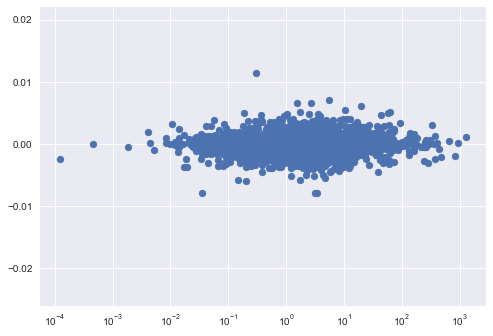

In [155]:
plt.scatter(flow,retrate)
plt.xscale('log')
plt.show()

In [1]:
def Jjuni() :
    txt = input("줄일 말을 입력하세요 : ")
    temp = txt.split(' ')
    a = []
    for i in temp :
        a.append(i[0])

    b = str()
    for j in range(len(a)) :
        b += a[j]

    print('아~~ {}?'.format(b))
    
Jjuni()

줄일 말을 입력하세요 : 나 늦.스카와서 법현사중~
아~~ 나늦법?


In [156]:
txt = '나 늦.스카와서 법현사중~'

In [160]:
temp = txt.split(' ')

In [161]:
temp

['나', '늦.스카와서', '법현사중~']

In [177]:
a = []
for i in temp :
    a.append(i[0])

b = str()
for j in range(a) :
    b += a[j]

print(b)

TypeError: 'list' object cannot be interpreted as an integer

In [169]:
a

['나', '늦', '법']

In [171]:
a[0] + a[1] + a[2]

'나늦법'

In [172]:
b = str()

In [173]:
b

''

In [184]:
Jjuni()

줄일 말을 입력하세요 : 아 배고프다 밥뭐먹지
아~~ 아배밥?
